# **Import libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import zipfile
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# **Data Collecting and Precossing**

In [6]:
trainpath = '../input/dogs-vs-cats/train.zip'
testpath = '../input/dogs-vs-cats/test1.zip'
files_path = "/kaggle/files/unzipped/"


with zipfile.ZipFile(trainpath, 'r') as zipp:
    zipp.extractall(files_path)
    
with zipfile.ZipFile(testpath, 'r') as zipp:
    zipp.extractall(files_path)


trainpath = "/kaggle/files/unzipped/train"
testpath = "/kaggle/files/unzipped/test1"


In [7]:
file = os.listdir(trainpath)
print(f'For Training data , found {len(file)} Photos')

For Training data , found 25000 Photos


In [8]:
s=[]
files = gb.glob(pathname= str( trainpath + '/*.jpg'))
for file in files:
    image = plt.imread(file)
    s.append(image.shape)
pd.Series(s).value_counts()

(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
                 ... 
(374, 295, 3)       1
(143, 255, 3)       1
(290, 183, 3)       1
(240, 155, 3)       1
(190, 157, 3)       1
Length: 8513, dtype: int64

In [9]:
file = os.listdir(testpath)
print(f'For Training data , found {len(file)} Photos')

For Training data , found 12500 Photos


In [10]:
s=[]
files = gb.glob(pathname= str( testpath + '/*.jpg'))
for file in files:
    image = plt.imread(file)
    s.append(image.shape)
pd.Series(s).value_counts()

(374, 500, 3)    1529
(375, 499, 3)    1522
(499, 375, 3)     133
(500, 374, 3)     123
(332, 500, 3)     113
                 ... 
(489, 270, 3)       1
(269, 265, 3)       1
(440, 359, 3)       1
(447, 335, 3)       1
(426, 500, 3)       1
Length: 4888, dtype: int64

In [11]:
size=180

In [12]:
X_train = []
Y_train = []
X_Title=[]

files = gb.glob(pathname= str( trainpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_train.append(list(image_array))
    file=file.split('/')[-1]
    sep=file.split('.')[0]
    X_Title.append(sep)
    if(sep=='dog'):
        Y_train.append(1)
    else:
        Y_train.append(0)
        
    

In [13]:
X_test = []

files = gb.glob(pathname= str( testpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_test.append(list(image_array))



In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {Y_train.shape}')


X_train shape  is (25000, 180, 180, 3)
X_test shape  is (12500, 180, 180, 3)
y_train shape  is (25000,)


In [15]:
print('Size OF Image = ',np.array(X_train[5]).shape)


Size OF Image =  (180, 180, 3)


# **Training Data Shuffle and Split**

In [16]:
X_train, Y_train= shuffle(X_train, Y_train, random_state=True)        


In [17]:
Y_train = tf.one_hot(Y_train, 2)


2022-10-22 15:36:21.768981: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
X_Train=X_train[:20000]
Y_Train=Y_train[:20000]
X_val=X_train[20000:]
y_val=Y_train[20000:]


In [19]:
X_Title=np.array(X_Title)


##### **Number of Dogs is equal to Number of Cats in Training Data**

<AxesSubplot:>

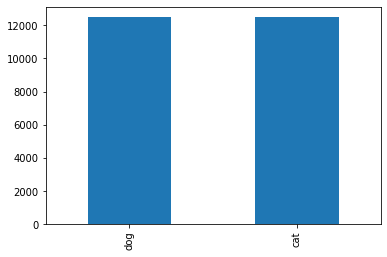

In [20]:
pd.Series(X_Title).value_counts().plot.bar()

# **Callbacks:**

In [21]:
Earlystop = EarlyStopping(patience=10)


In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            lr=0.00001,
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [23]:
callbacks = [Earlystop, learning_rate_reduction]

# **Data Augmentation**

# **CNN Model**

In [24]:
 


data_augmentation_layer = keras.Sequential([                                    
  keras.layers.RandomFlip('horizontal',input_shape=(size, size, 3)),
  keras.layers.RandomRotation(0.15),
  keras.layers.RandomZoom(0.2),
  keras.layers.RandomWidth(0.1),
  keras.layers.RandomHeight(0.1),
], name='data_augmentation')

model = keras.Sequential([
data_augmentation_layer,
    
keras.layers.Conv2D(filters=16,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
    
keras.layers.Conv2D(filters=32,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
keras.layers.BatchNormalization(),
    
keras.layers.Conv2D(filters=64,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
    
keras.layers.Conv2D(filters=128,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
  
keras.layers.Conv2D(filters=256,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
  
keras.layers.Conv2D(filters=512,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
   
keras.layers.GlobalMaxPool2D(),  
    
keras.layers.Dense(512,activation='relu') ,

keras.layers.Dense(256,activation='relu') ,

keras.layers.BatchNormalization(),
keras.layers.Dense(128,activation='relu') ,
    

keras.layers.Dense(64,activation='relu') ,
    
keras.layers.Dense(32,activation='relu') ,
keras.layers.Dense(16,activation='relu') ,
    
keras.layers.Dense(units=2,activation='softmax'),
    
#keras.layers.Dropout(0.2)

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 16)    448       
_________________________________________________________________
activation (Activation)      (None, None, None, 16)    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 16)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
activation_1 (Activation)    (None, None, None, 32)    0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0

# **Train and lets see the accuracy rate our Model**

In [25]:
epochs = 25

ThisModel = model.fit(X_Train, Y_Train, epochs=epochs,batch_size=32,verbose=1,callbacks=callbacks, validation_data=(X_val, y_val))

2022-10-22 15:36:23.358065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
625/625 [==============================] - 233s 369ms/step - loss: 0.6437 - accuracy: 0.6313 - val_loss: 0.6204 - val_accuracy: 0.6648
Epoch 2/25
625/625 [==============================] - 228s 365ms/step - loss: 0.5599 - accuracy: 0.7219 - val_loss: 0.5706 - val_accuracy: 0.6844
Epoch 3/25
625/625 [==============================] - 228s 365ms/step - loss: 0.5011 - accuracy: 0.7623 - val_loss: 0.5929 - val_accuracy: 0.7334
Epoch 4/25
625/625 [==============================] - 228s 364ms/step - loss: 0.4485 - accuracy: 0.7966 - val_loss: 0.6880 - val_accuracy: 0.6872
Epoch 5/25
625/625 [==============================] - 228s 365ms/step - loss: 0.4073 - accuracy: 0.8187 - val_loss: 0.5780 - val_accuracy: 0.7588
Epoch 6/25
625/625 [==============================] - 230s 368ms/step - loss: 0.3751 - accuracy: 0.8335 - val_loss: 0.4032 - val_accuracy: 0.7984
Epoch 7/25
625/625 [==============================] - 232s 371ms/step - loss: 0.3470 - accuracy: 0.8489 - val_loss: 0.3228 -

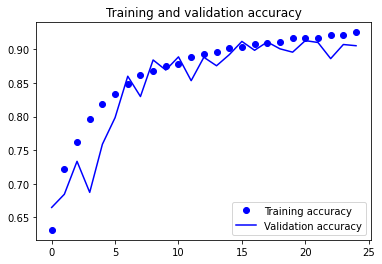

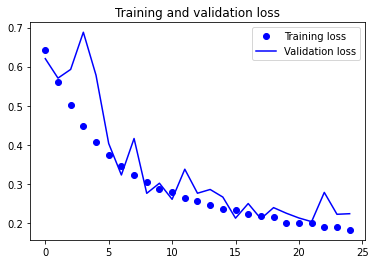

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = ThisModel.history['accuracy']
val_accuracy = ThisModel.history['val_accuracy']
loss = ThisModel.history['loss']
val_loss = ThisModel.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Prediction**

In [27]:
y_result = model.predict(X_test)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (12500, 2)


In [28]:
def get_code(n):
    if n == 1:
        return 'Dog'
    else:
        return 'Cat'
    
    
    
from sklearn.metrics import confusion_matrix
y_true = []        

for i,x in enumerate(X_Train):
    y_true.append(np.argmax(X_Train[i]))
    
y_predict = []

for i,x in enumerate(Y_Train.numpy()):
    y_predict.append(np.argmax(Y_Train[i]))

print(confusion_matrix(y_true,y_predict))

[[276 267   0 ...   0   0   0]
 [ 30  44   0 ...   0   0   0]
 [ 29  46   0 ...   0   0   0]
 ...
 [  1   1   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  2   0   0 ...   0   0   0]]


In [40]:
print(X_Train[0][0])

[[ 77  96  99]
 [ 72  90  92]
 [ 84 101 104]
 [ 91 105 108]
 [ 86  98 102]
 [ 86  93  99]
 [ 97  92 104]
 [ 97  96 107]
 [ 89  95 102]
 [ 83  96  98]
 [ 88 106 103]
 [ 74  93  92]
 [ 79  96  99]
 [ 77  92  95]
 [ 93 104 108]
 [ 85  93  97]
 [ 96 101 106]
 [143 156 158]
 [151 166 167]
 [135 147 149]
 [148 155 158]
 [144 149 152]
 [102 105 109]
 [ 86 100 105]
 [ 84  96 103]
 [ 87  95 104]
 [ 89  93 104]
 [ 92  92 106]
 [ 90  90 104]
 [ 83  93 100]
 [ 75  90  93]
 [ 77  97  98]
 [ 80  99  97]
 [ 87 101  99]
 [ 69  82  80]
 [ 82  95  95]
 [ 85  97  99]
 [ 86  96 102]
 [ 78  87  96]
 [ 85  94 104]
 [ 84  98 106]
 [ 72  90  95]
 [ 81  96 102]
 [ 80  91  97]
 [ 88  97 104]
 [ 85  91  98]
 [ 89  91 108]
 [ 86  89 104]
 [ 83  84  98]
 [ 91  91 102]
 [109 109 118]
 [128 128 137]
 [145 145 157]
 [153 157 165]
 [154 164 168]
 [162 178 179]
 [166 189 185]
 [155 181 175]
 [146 175 170]
 [125 152 148]
 [ 90 115 111]
 [ 79 102  98]
 [ 80 101  98]
 [ 74  93  94]
 [ 78  94 100]
 [ 77  91  97]
 [ 74  83 

In [29]:
print(y_predict)

[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 

In [30]:
print(y_true)

[46698, 9984, 35198, 20851, 15018, 81881, 19274, 62422, 449, 36474, 15405, 13232, 239, 18, 2, 37610, 81538, 86810, 168, 7965, 53686, 12699, 41359, 46080, 34853, 8510, 10619, 0, 43529, 6651, 351, 16034, 41747, 28866, 5434, 30732, 8310, 1126, 471, 17213, 10100, 27128, 6225, 19214, 72530, 32204, 183, 37510, 51482, 129, 64472, 34113, 0, 40766, 25594, 105, 20438, 93077, 12584, 12749, 16746, 41738, 201, 21407, 30407, 20960, 90015, 95351, 19710, 76778, 19186, 0, 8199, 33033, 4167, 43814, 81801, 30552, 76718, 947, 3554, 77970, 42341, 6333, 23688, 270, 405, 20, 71213, 13136, 7794, 18074, 396, 33063, 51689, 30623, 117, 40725, 35969, 24077, 1014, 47189, 40230, 47744, 89092, 59204, 45602, 96771, 67007, 19923, 24155, 20840, 12987, 30998, 33080, 0, 93768, 1653, 90908, 5278, 5585, 1604, 11585, 17854, 59780, 57660, 54507, 227, 25937, 16670, 25870, 43986, 1, 39684, 465, 40694, 90330, 96729, 29433, 65309, 92106, 46341, 0, 54398, 39803, 23085, 13079, 65262, 460, 30, 131, 19070, 49560, 34709, 70466, 4224,

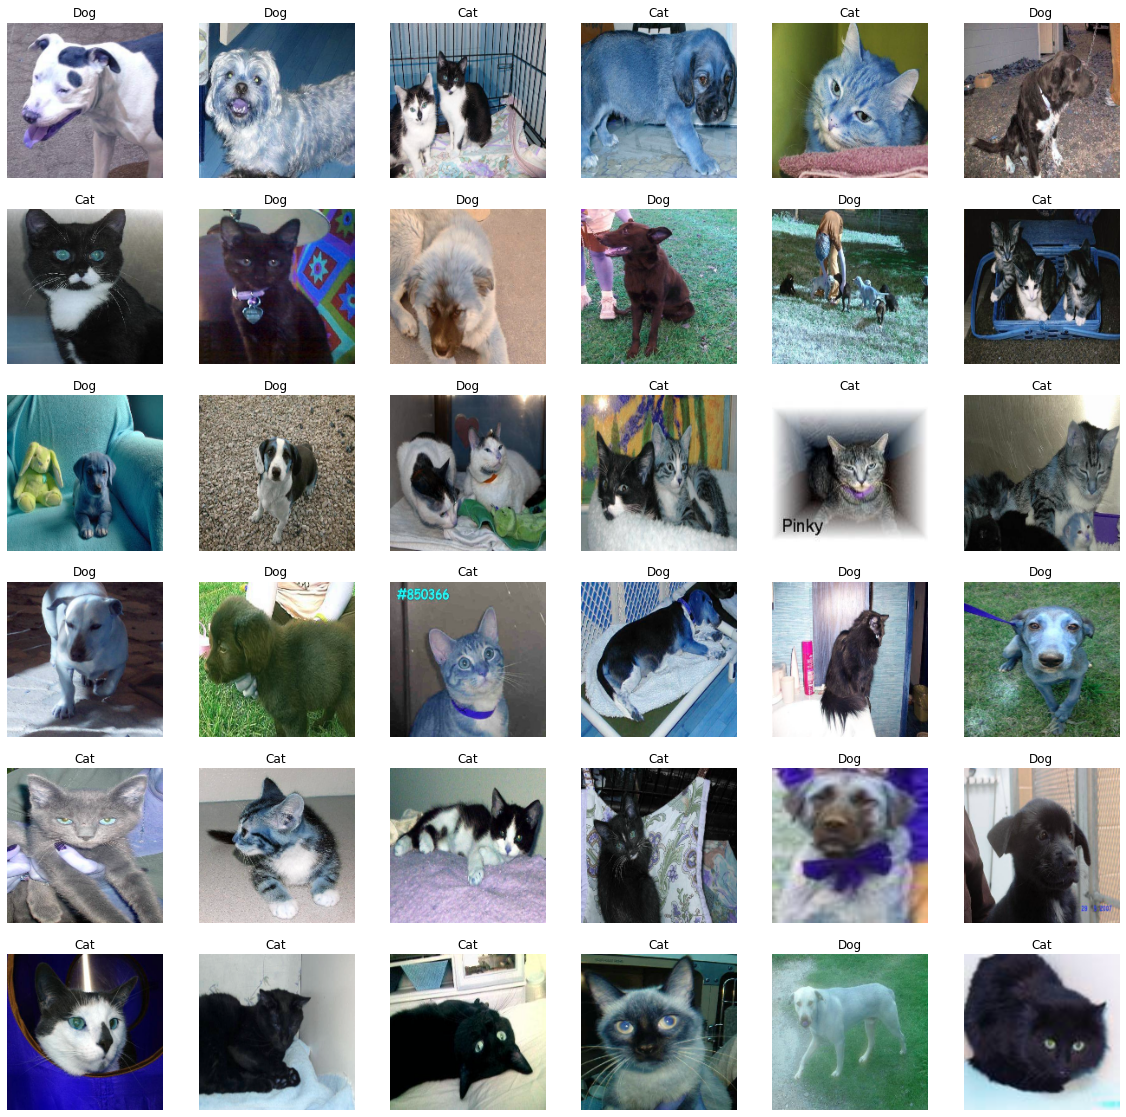

In [31]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(array_to_img(X_test[i]))     
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

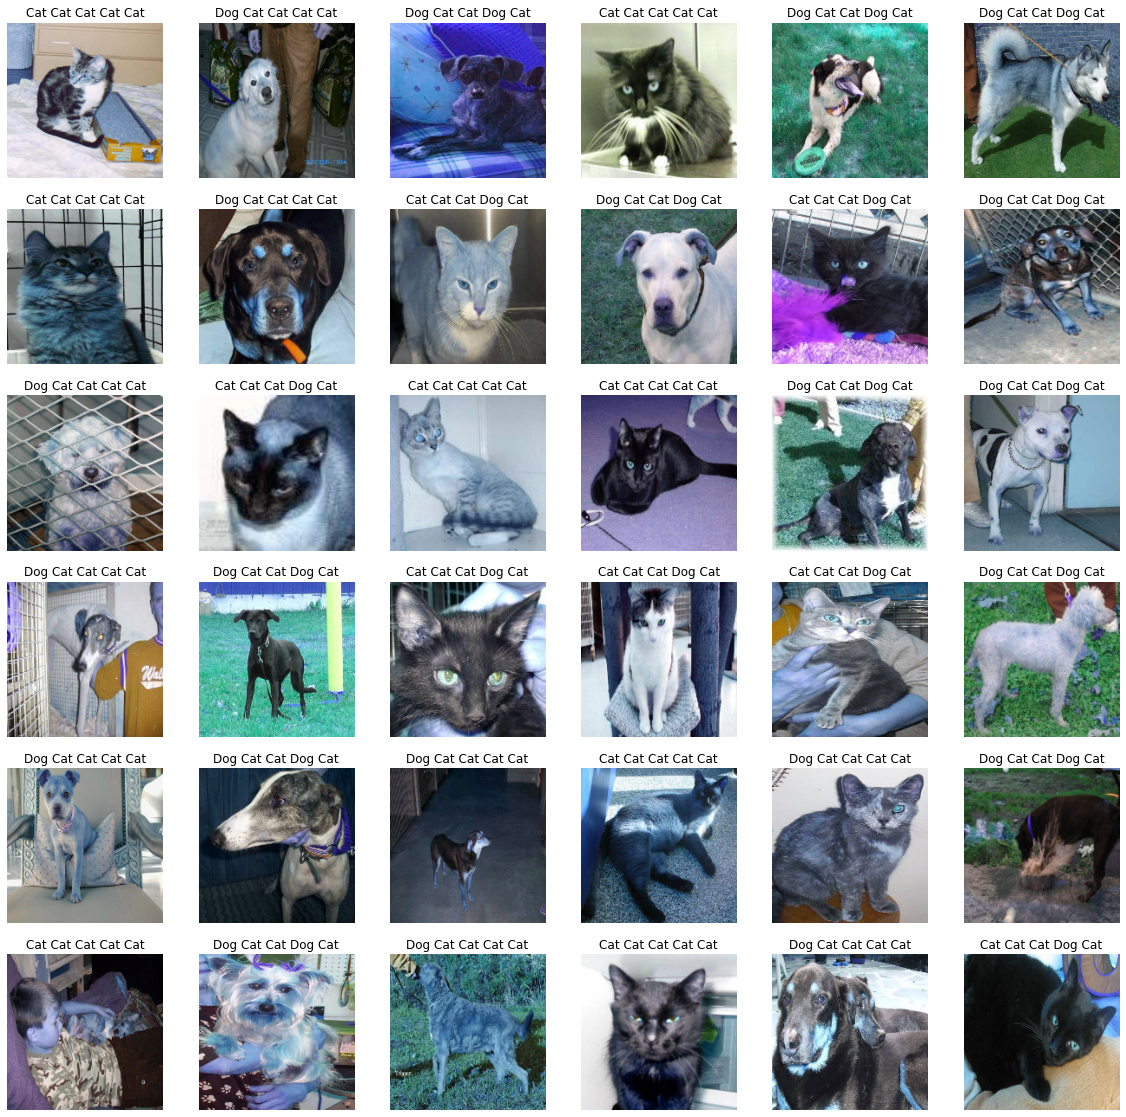

In [32]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(array_to_img(X_test[i]))     
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i]))+" " + get_code(np.argmax(X_test[i])) + " " + get_code(np.argmax(X_train[i])) + " " + get_code(np.argmax(Y_train[i])) + " " + get_code(np.argmax(X_Title[i])))

In [33]:
Y=np.argmax(y_result, axis=-1)

In [34]:
pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')


id  label
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
12495  12496      0
12496  12497      0
12497  12498      0
12498  12499      0
12499  12500      0

[12500 rows x 2 columns]

In [35]:
submission_result = pd.DataFrame(
    {
        'id':np.arange(1,len(Y)+1),
        'label':Y
    }
)

In [36]:
submission_result


id  label
0          1      0
1          2      1
2          3      0
3          4      0
4          5      0
...      ...    ...
12495  12496      1
12496  12497      0
12497  12498      1
12498  12499      0
12499  12500      1

[12500 rows x 2 columns]